# Red Wine Draft 16

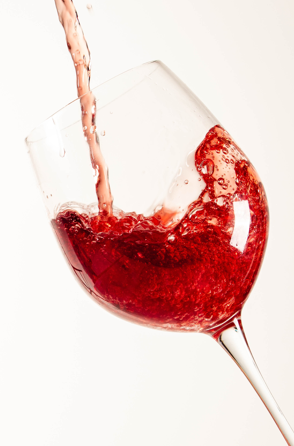

<center>Photo by <a href="https://unsplash.com/@maxtutakphotography?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Max Tutak</a> on <a href="https://unsplash.com/s/photos/wine?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>

# Introduction

Red wine is an alcoholic beverage made by fermenting the juice of dark-skinned grapes. Alcohol occurs when yeast converts grape sugar into ethanol. The alcohol content in red wine usually ranges from 12% to 15%. In this report, I analyzed nearly 1,600 datapoints related to red wine. Each datapoint consists of 12 features. All features except "quality" is an objective measurment. The quality scores were given by a human testers. The score is between 3 and 8. 

# Goals

1. Determine which physiochemical properties make a wine "good."  
2. Determine if any set of features would more likely result in a human tester giving the wine a score of 7 or 8. 
3. Determine which combination of features would determine the alcohol content of the wine. 

# Technical Requirements

1. Download the data.
2. Load data using SQLite and Pandas.
3. Perform exploratory data analysis.
4. Provide clear explanations. 
5. Provide suggestions about how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** This report concentrates on wines that received a quality score of 7 or 8.
>* **Standard 2:** For correlation between features, my threshold was 0.8 or higher indicates a correlation.

# Biases

I am not aware of any biases in myself or in the data. 

# Libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import math


from IPython.display import display
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from scipy import stats

# Display Parameters

## Display Features

In [105]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Colors

In [106]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [107]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load and Display Raw Data

In [108]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

In [109]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


## Dividing the Dataset Based on the Quality Score

Creation of separate datasets for each wine quality category.

In [329]:
three = redwine[redwine["quality"] == 3]

In [330]:
four = redwine[redwine["quality"] == 4]

In [331]:
five = redwine[redwine["quality"] == 5]

In [332]:
six = redwine[redwine["quality"] == 6]

In [333]:
seven = redwine[redwine["quality"] == 7]

In [334]:
eight = redwine[redwine["quality"] == 8]

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Exploratory Data Analysis

Below the reader will find general information about this dataset.

## Dimensions

In [116]:
redwine.shape

(1599, 12)

## Data Types

In [117]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Descriptive Statistics

In [118]:
redwine.describe(include="all").applymap("{:,.2f}".format)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00"
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


### Section Summary
> * Of the 1600 wines in the dataset, only 18 received a quality score of 8. 
> * Over 75% of the wines received the mid-range score of 5 or 6.

## Quality Scores

In this section, the reader will find the number of wines in each quality category.

In [120]:
quality_counts = redwine["quality"].value_counts()
quality_counts = quality_counts.to_frame()
quality_counts.index.names = ["Quality"]
quality_counts.rename(columns={"quality": "Count"}, inplace=True)
quality_counts = quality_counts.reset_index()

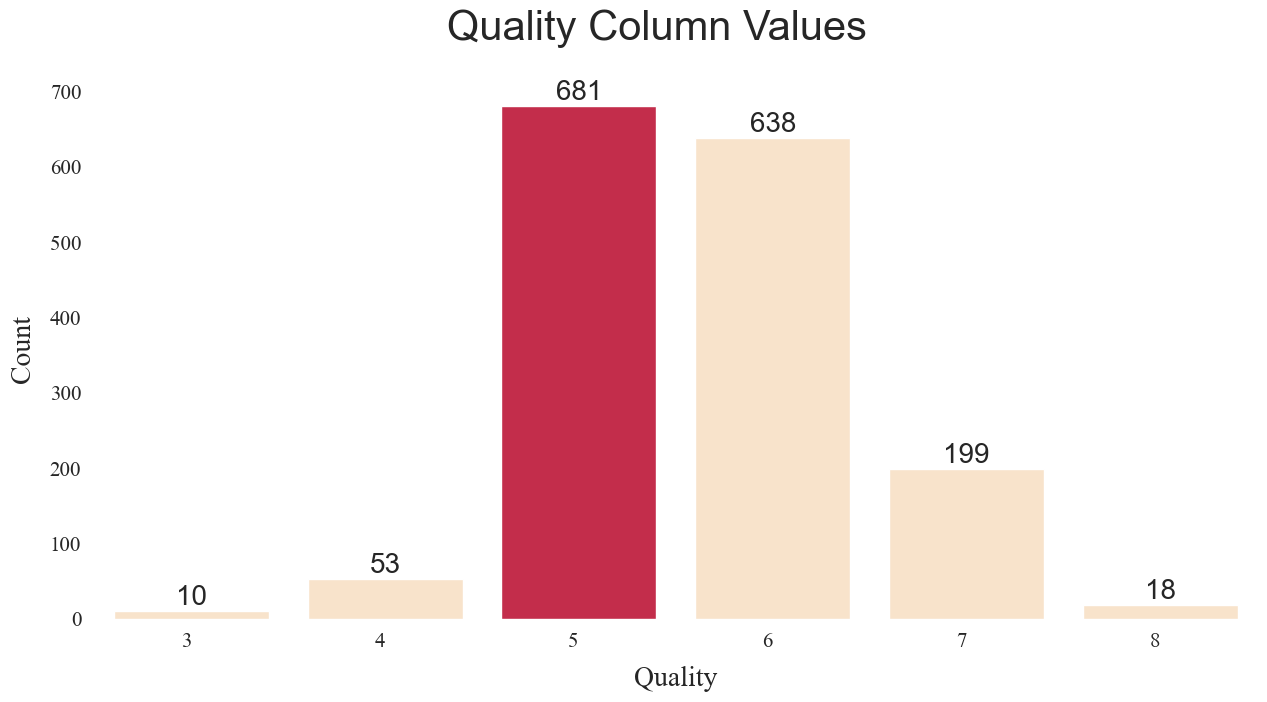

In [121]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Quality",
    y="Count",
    data=quality_counts,
    errorbar=None,
    palette=[color_1 if x != 7 else color_2 for x in quality_counts["Quality"]],
)

chart.bar_label(chart.containers[0], size=size)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment="right")
plt.suptitle("Number of Wines in Each Quality Category")

plt.show()

### Section Summary
> * Of the 1600 wines in the dataset, only 18 received a quality score of 8. 
> * Over 75% of the wines received the mid-range score of 5 or 6.

# Hypothesis Tests

In addition to my general analysis, I tested the following hypotheses.

## Helper Functions

These functions were used in this section of the report.

In [122]:
def two_tailed_z_test(sample_mean, sample_size, pop_mean, pop_std, critical_value):
    """
    Determines if the mean of a sample is significanlty different than the mean of a population.
    """

    result = (sample_mean - pop_mean) / (pop_std / math.sqrt(sample_size))
    if result < critical_value:
        print("Failed to reject the null hypothesis.")
    else:
        print("Null hypothesis is rejected.")

In [123]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """

    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

## Hypothesis 1

**Null**: There is no significant difference between the mean fixed acidity of wines with qualilty 3 and the mean fixed acidity of all wines in the database. <BR>
**Alternative**: The mean fixed acidity of wines with qualilty 3 is significantly different than the mean fixed acidity of all wines in the database.

In [124]:
l = [3]

two_tailed_z_test(
    np.average(three["fixed acidity"]),
    three.shape[0],
    redwine["fixed acidity"].agg([np.mean]).item(),
    redwine[~redwine.quality.isin(l)]["fixed acidity"].agg([np.std]).item(),
    1.960,
)

Failed to reject the null hypothesis.


### Section Summary
> * There is no significant difference in the mean fixed acidity in wines with quality 3 as compared to the same measure in all the other wines in the dataset. 

## Hypothesis 2

**Null**: There is no significant difference between the mean free sulfur dioxide of Quality 3 wines and the mean free sulfur dioxide of Quality 8 wines. <BR>
**Alternative**: The mean free sulfur dioxide of Quality 3 wines is significantly different than the mean free sulfur dioxide of Quality 8 wines.

In [125]:
three_sample = three
eight_sample = eight

In [126]:
var_three_sample = np.var(three_sample["free sulfur dioxide"])
var_eight_sample = np.var(eight_sample["free sulfur dioxide"])

if var_three_sample == var_eight_sample:
    variance = True
else:
    variance = False

In [127]:
two_sample_t_test(
    three_sample["free sulfur dioxide"], eight_sample["free sulfur dioxide"], variance
)

The variance of the samples are different.
Failed to reject the null hypothesis.


### Section Summary
> * There is no significant difference between the mean free sulfur dioxide content in wines with quality 3 as compared to the same measure in wines of quality 8. 

## Hypothesis 3

**Null**: There is no significant difference between the mean pH of wines with alcohol content above 10 and the mean pH of wines with alcohol content below 10.<BR>
**Alternative**: The mean pH of wines with alcohol content above 10 is significantly different than the mean pH of wines with alcohol content below 10. 

## Two-Sample T-Test

In [128]:
hi_alcohol = redwine.query("alcohol > 10")
lo_alcohol = redwine.query("alcohol < 10")

In [129]:
var_hi_alcohol = np.var(hi_alcohol["pH"])
var_lo_alcohol = np.var(lo_alcohol["pH"])

if var_hi_alcohol == var_lo_alcohol:
    variance = True
else:
    variance = False

In [130]:
two_sample_t_test(hi_alcohol["pH"], lo_alcohol["pH"], variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * There is a significant difference between the mean pH of wines with alcohol content above 10 and the mean pH of wines with alcohol content below 10.

# Correlations

Below the reader will find issues related multicolleniearity. 

## Helper Function

This function was used in this section of the report.

In [2]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(16, 16))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size * 1.5},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

### Correlation of Features in Wines with Quality Score 3

How wines features are correlated with one another in this category.

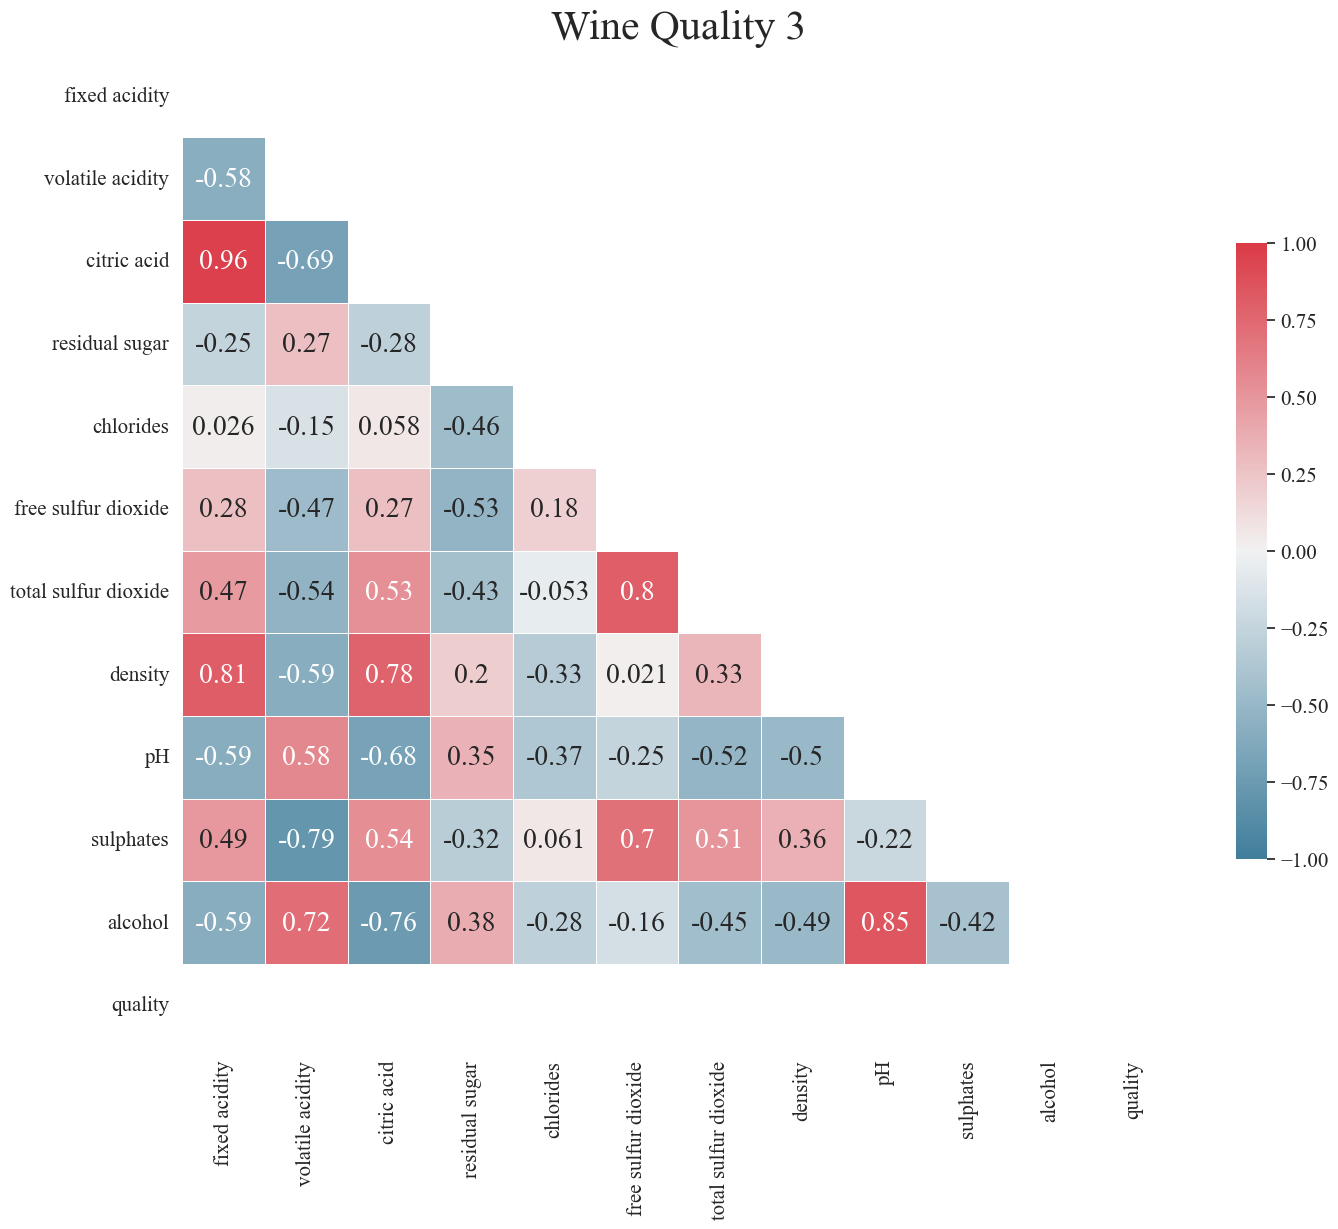

In [231]:
data = three
title = "Wine Quality 3"
create_heatmap(data, title)

### Section Summary
> * When looking at only wines of quality 3, we can observe correlations in this way:
         citric acid - density - fixed acidity
         free sulfur dioxide - total sulfur dioxide
         pH - alcohol

### Correlation of Features in Wines with Quality Score 4

How wines features are correlated with one another in this category.

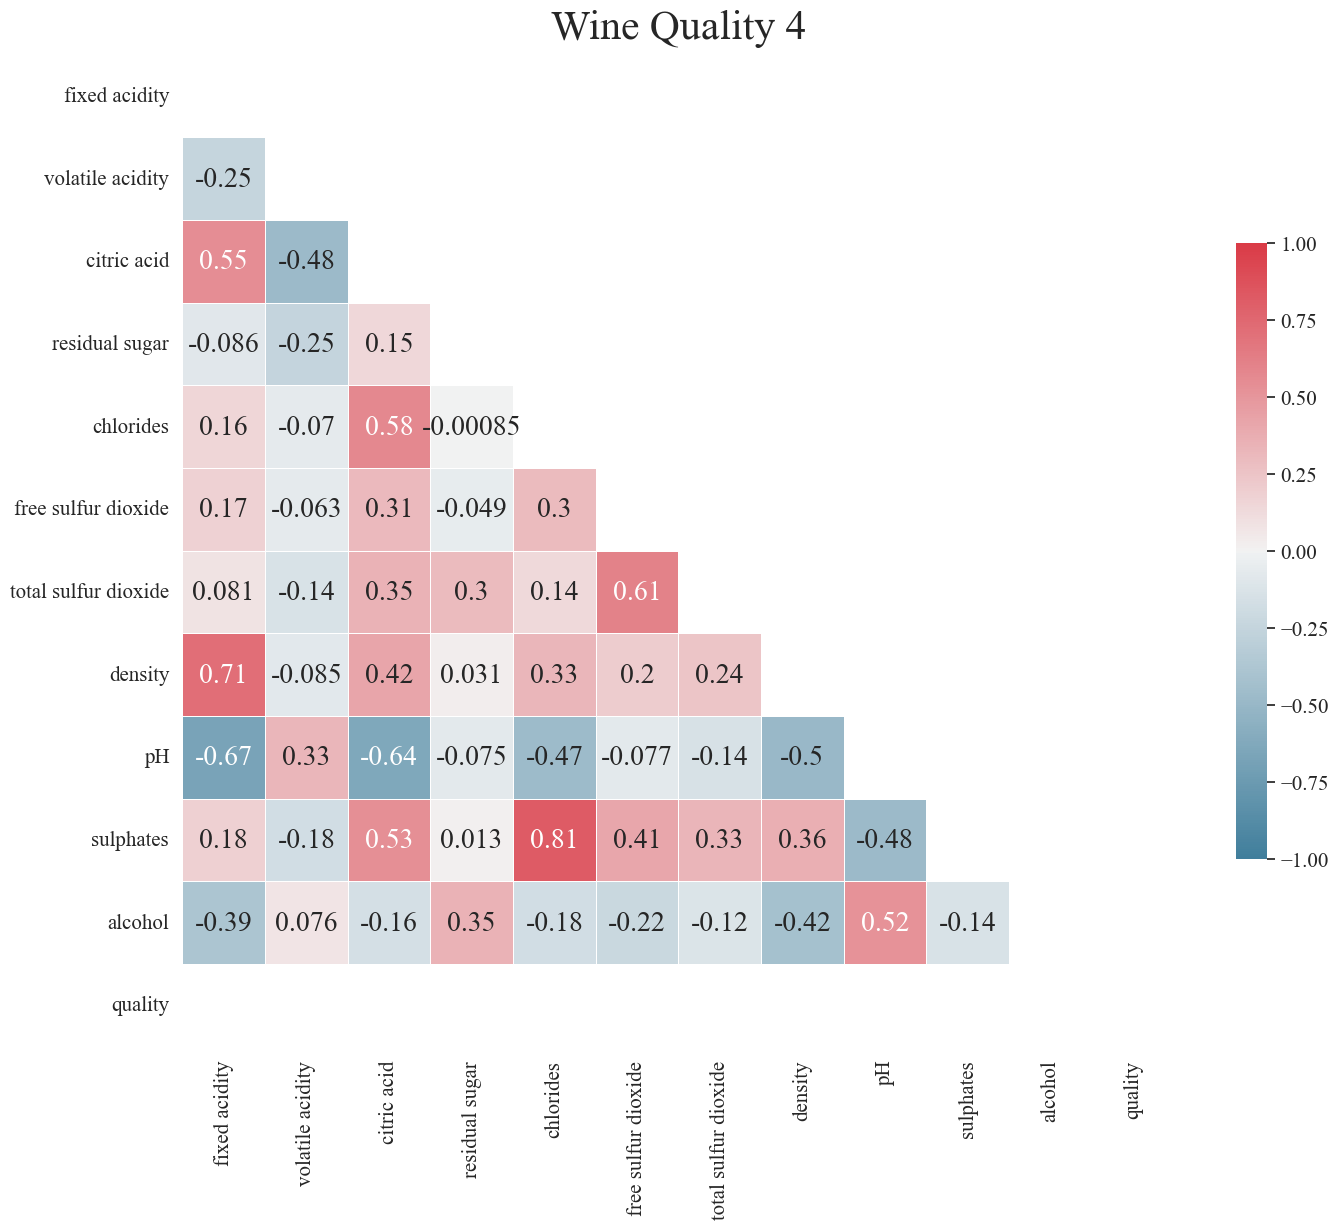

In [217]:
data = four
title = "Wine Quality 4"
create_heatmap(data, title)

### Section Summary
> * With a correlation threshod of 0.8, there seems to be only one correlation: <BR>
        chloides - sulphates 

### Correlation of Features in Wines with Quality Score 5

How wines features are correlated with one another in this category.

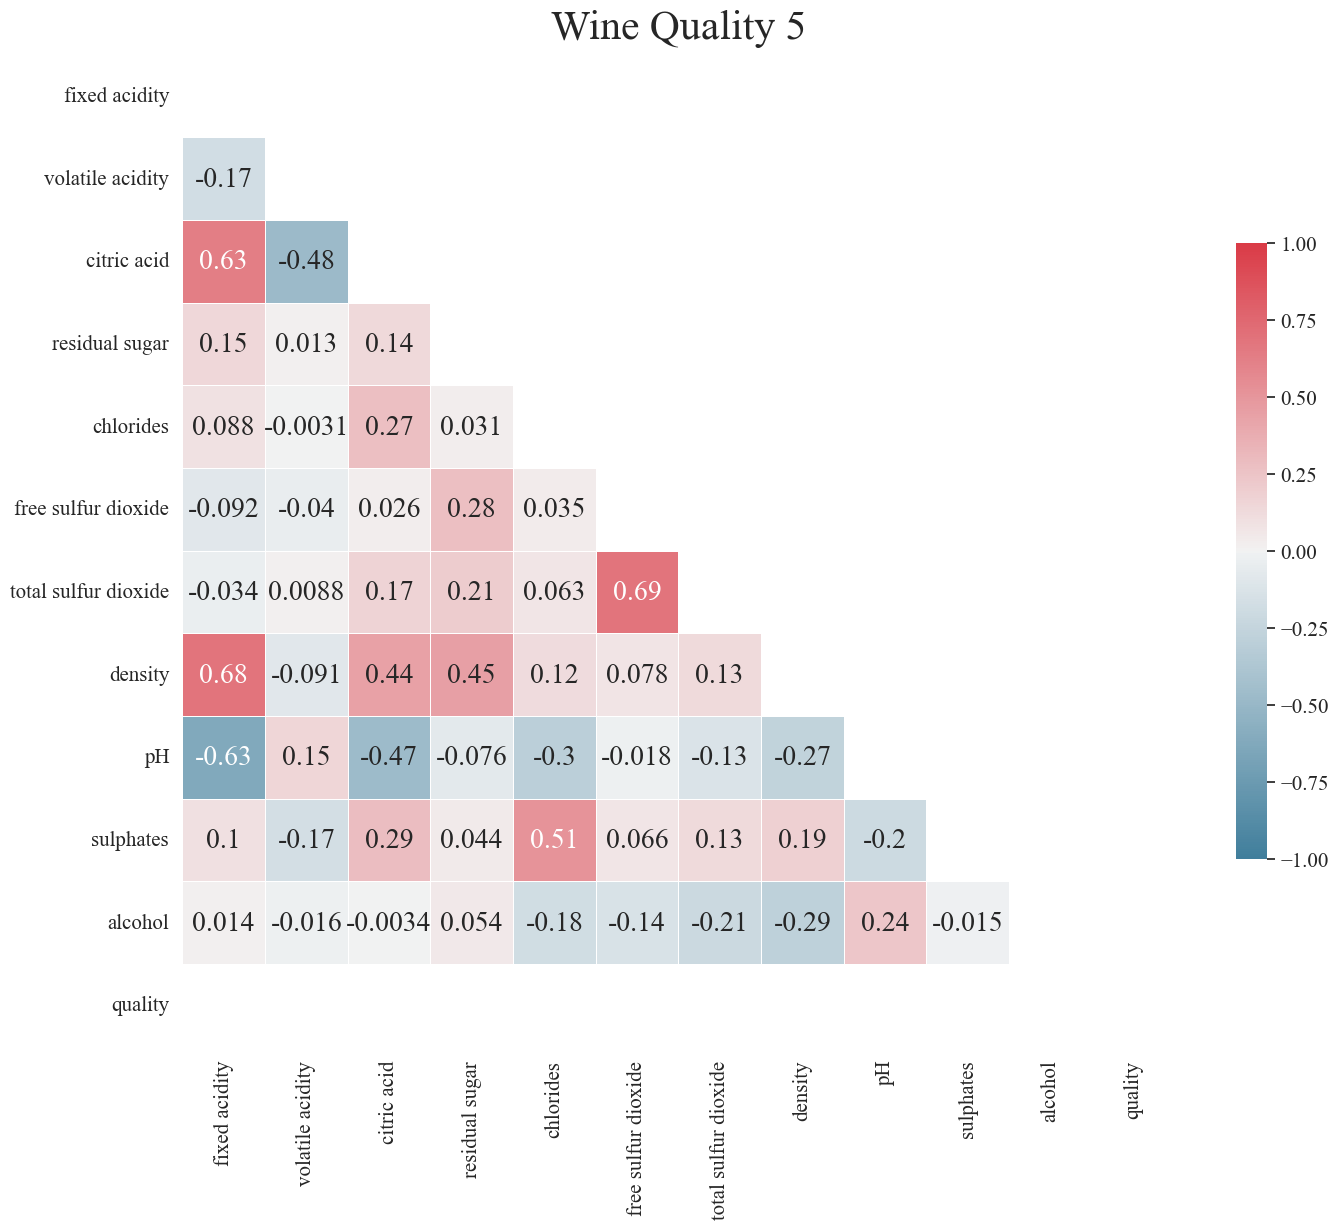

In [218]:
data = five
title = "Wine Quality 5"
create_heatmap(data, title)

### Section Summary
> * With a correlation threshod of 0.8, there seems to be no correlation between the any of the features when looking at all features of wines of quality 5. 

### Correlation of Features in Wines with Quality Score 6

How wines features are correlated with one another in this category.

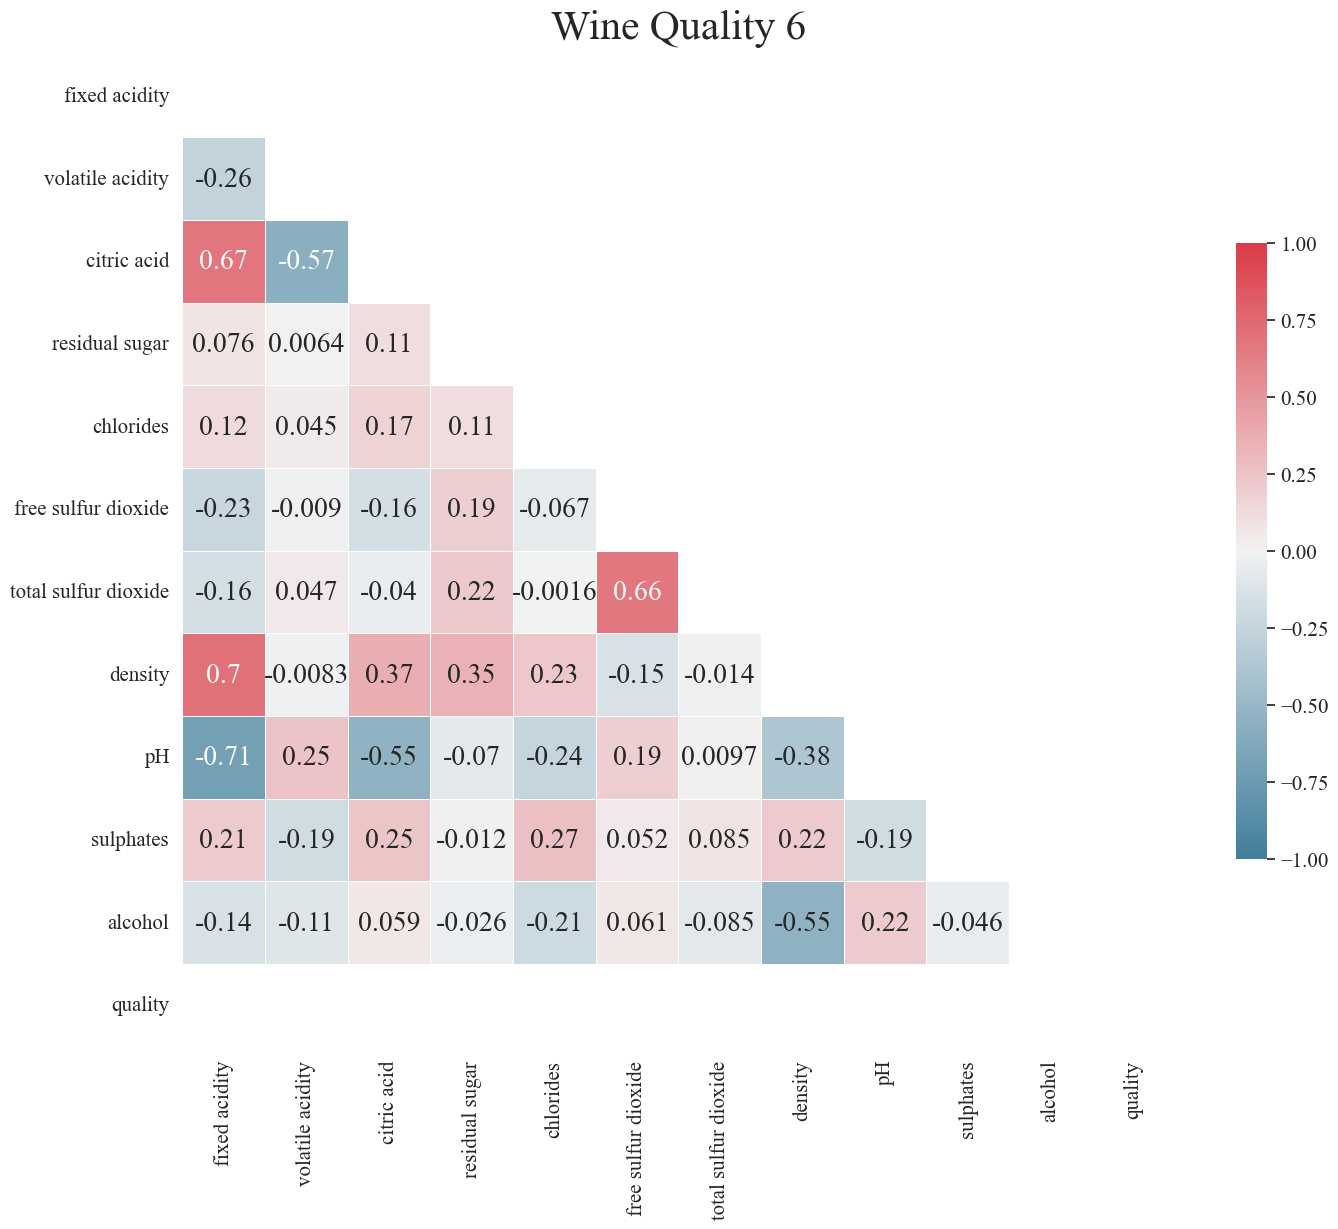

In [219]:
data = six
title = "Wine Quality 6"
create_heatmap(data, title)

### Section Summary
> * With a correlation threshod of 0.8, there seems to be no correlation between the any of the features when looking at all features of wines of quality 6. 

### Correlation of Features in Wines with Quality Score 7

How wines features are correlated with one another in this category.

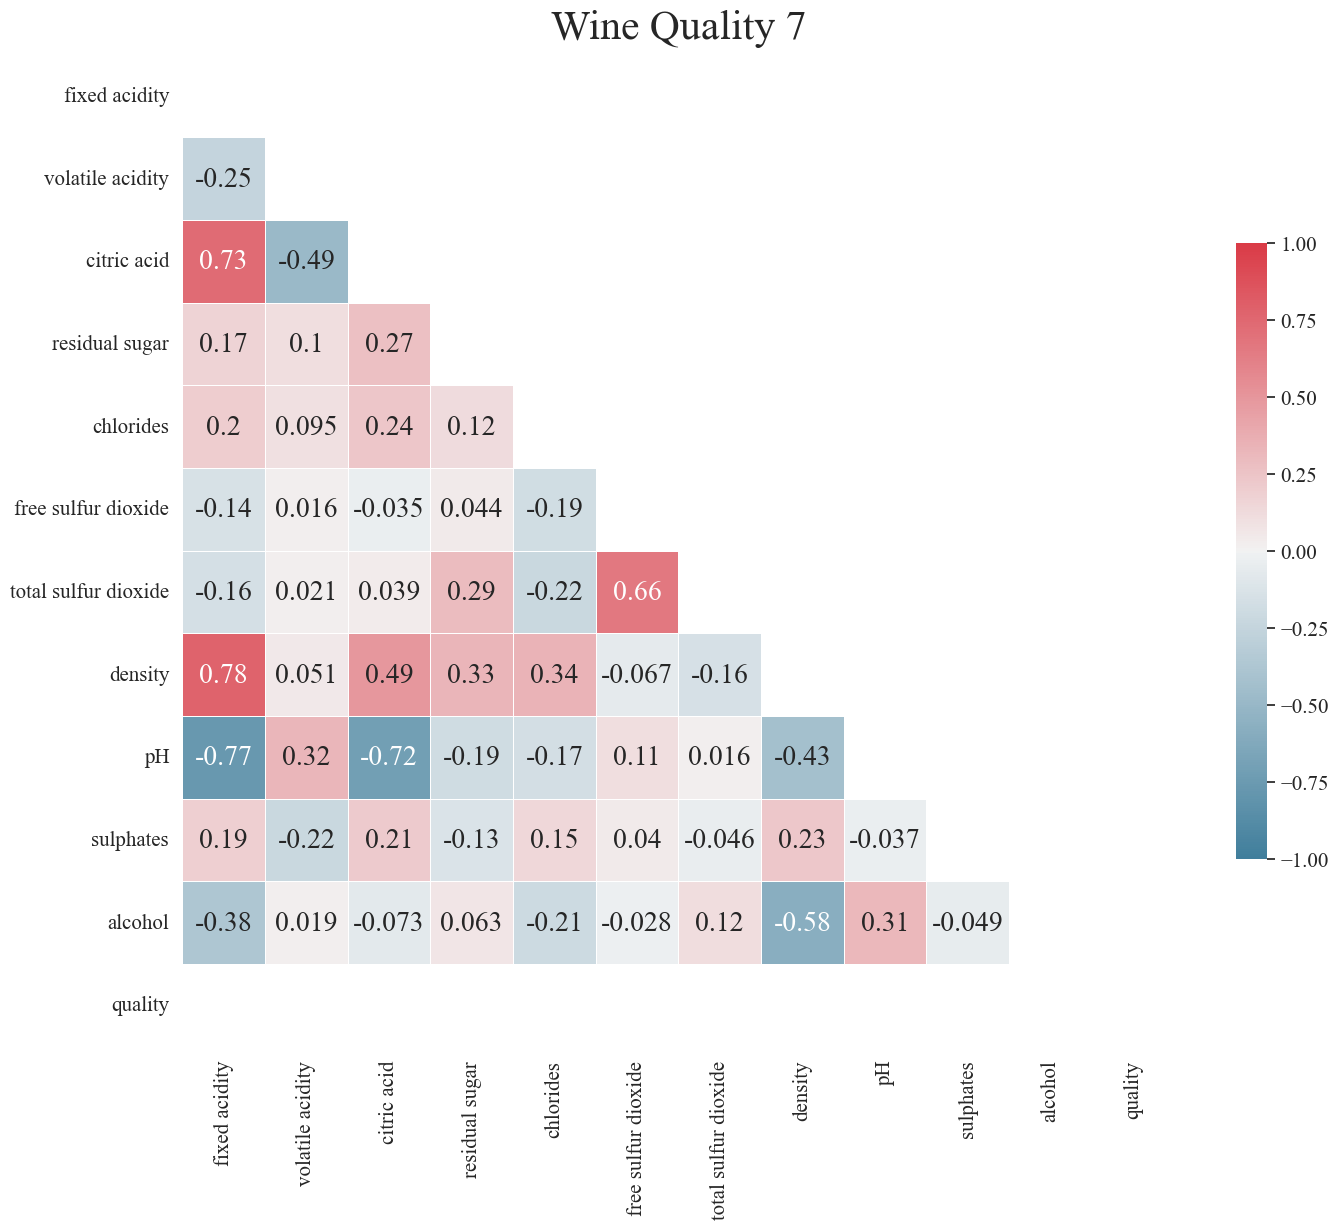

In [220]:
data = seven
title = "Wine Quality 7"
create_heatmap(data, title)

### Section Summary
> * With a correlation threshod of 0.8, there seems to be no correlation between the any of the features when looking at all features of wines of quality 7. 

### Correlation of Features in Wines with Quality Score 8

How wines features are correlated with one another in this category.

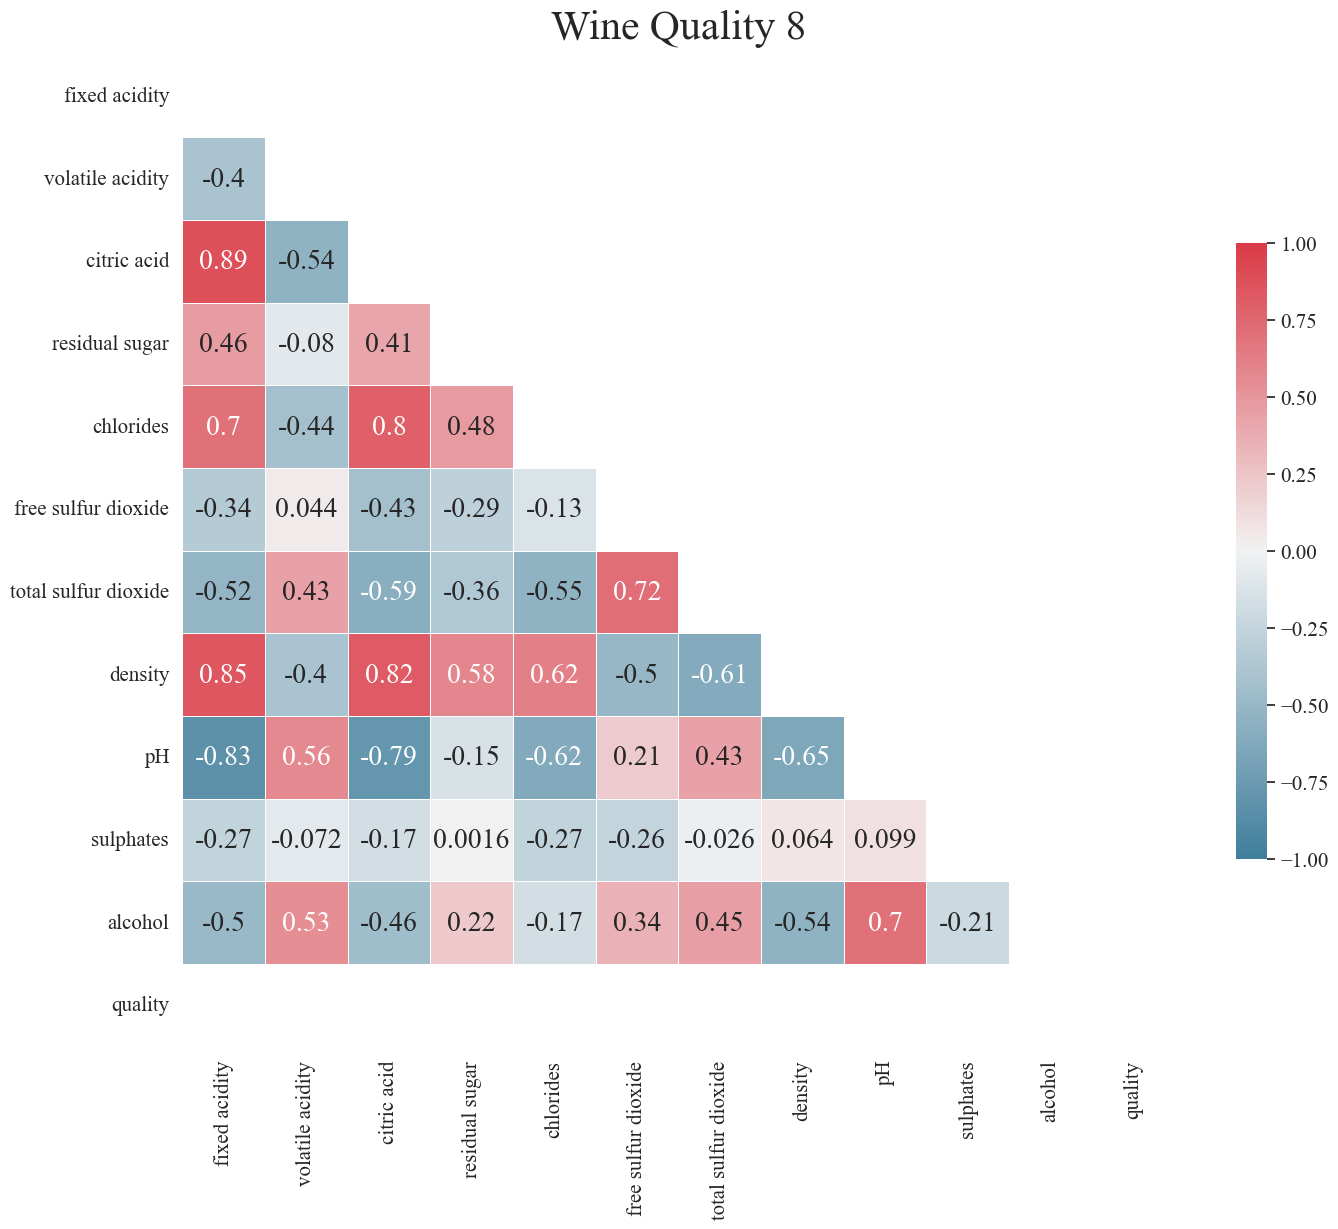

In [221]:
data = eight
title = "Wine Quality 8"
create_heatmap(data, title)

### Section Summary
> * When looking at only wines of quality 8, we can observe correlations in this way:
            citric acid - density - fixed acidity
            citric acid - density - chlorides

# Dividing the Dataset into Two Groups by Wine Quality Score

Wine qualities 7 and 8: 1. Wine qualities 3, 4, 5, 6: 0

In [336]:
redwine["quality"] = redwine["quality"].replace([7, 8], 1)
redwine["quality"] = redwine["quality"].replace([3, 4, 5, 6], 0)

# Logistic Regression

Logistic Regression

## Helper Functions

Functions used in this section.

In [140]:
def normalize_data(columns):
    '''
    Normalizes all data columns.
    '''

    scaler = MinMaxScaler()

    scaled_data = scaler.fit_transform(redwine)
    scaled_data = pd.DataFrame(
        scaled_data,
        columns=columns,
    )

    return scaled_data

In [141]:
def create_varialbles(data, indepdent_varialble, dependent_variable):
    """
    Identifies ndent and dependent variables.
    """

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

In [142]:
def random_oversampler(X, y):
    """
    Creates balanced numbers of datapoints.
    """

    oversample = RandomOverSampler(sampling_strategy="minority")
    oversample = RandomOverSampler(sampling_strategy="auto")
    steps = [("over", RandomOverSampler()), ("model", LogisticRegression())]
    pipeline = Pipeline(steps=steps)
    X, y = oversample.fit_resample(X, y)

    return X, y

In [143]:
def logistic_regression_model(X, y):
    """
    Creates logistic regression model.
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.4, random_state=0
    )
    log_model = LogisticRegression(solver="liblinear", random_state=None)
    log_model.fit(X_train, y_train)
    y_predict = log_model.predict(X_test)

    return log_model, X_test, y_test, y_predict

In [144]:
def print_confusion_matrix(y_test, y_predict):
    """
    Prints the confusion matrix.
    """

    print(confusion_matrix(y_test, y_predict))

In [145]:
def print_classification_report(y_test, y_predict):
    """
    Prints the classification report.
    """

    print(classification_report(y_test, y_predict))

In [146]:
def display_roc_curve(log_model, X_test, y_test, y_predict):
    """
    Displays the Receiver Operating Characteristic (ROC) Curve.
    """
    
    plt.rcParams.update(params)
    sns.despine(left=True, bottom=True)

    logit_roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")

    plt.show()

## Data Normalization

In [147]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

scaled_redwine_logistic = normalize_data(columns)

## Logistic Regression Citric Acid and Quality

Performing logistic regression: Citric Acid and Quality

In [148]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "citric acid",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [149]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65       566
         1.0       0.64      0.72      0.67       540

    accuracy                           0.66      1106
   macro avg       0.66      0.66      0.66      1106
weighted avg       0.67      0.66      0.66      1106



## Logistic Regression Density and Quality

Logistic regression density and quality

In [150]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "density",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [151]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58       566
         1.0       0.57      0.62      0.60       540

    accuracy                           0.59      1106
   macro avg       0.59      0.59      0.59      1106
weighted avg       0.59      0.59      0.59      1106



## Logistic Regression Fixed Acidity and Quality

Logistic Regression Fixed Acidity and Quality

In [152]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "fixed acidity",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [153]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61       566
         1.0       0.58      0.56      0.57       540

    accuracy                           0.59      1106
   macro avg       0.59      0.59      0.59      1106
weighted avg       0.59      0.59      0.59      1106



## Logistic Regression Chlorides and Quality

Logistic Regression Chlorides and Quality

In [154]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "chlorides",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [155]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.56      0.31      0.40       566
         1.0       0.51      0.74      0.60       540

    accuracy                           0.52      1106
   macro avg       0.54      0.53      0.50      1106
weighted avg       0.54      0.52      0.50      1106



## Logistic Regression Sulfates and Quality

Logistic Regression Sulfates and Quality

In [156]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "sulphates",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [157]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       566
         1.0       0.69      0.72      0.70       540

    accuracy                           0.71      1106
   macro avg       0.71      0.71      0.71      1106
weighted avg       0.71      0.71      0.71      1106



## Logistic Regression Total Sulfur Dioxide and Quality

Logistic Regression Total Sulfur Dioxide and Quality

In [158]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "total sulfur dioxide",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [159]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.64      0.45      0.53       566
         1.0       0.56      0.73      0.63       540

    accuracy                           0.59      1106
   macro avg       0.60      0.59      0.58      1106
weighted avg       0.60      0.59      0.58      1106



## Logistic Regression Free Sulfur Dioxide and Quality

Logistic Regression Free Sulfur Dioxide and Quality


In [160]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "free sulfur dioxide",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [161]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.60      0.39      0.47       566
         1.0       0.53      0.73      0.62       540

    accuracy                           0.56      1106
   macro avg       0.57      0.56      0.54      1106
weighted avg       0.57      0.56      0.54      1106



## Logistic Regression Alcohol and Quality

Logistic Regression Alcohol and Quality

In [162]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [163]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74       566
         1.0       0.72      0.79      0.75       540

    accuracy                           0.74      1106
   macro avg       0.75      0.75      0.74      1106
weighted avg       0.75      0.74      0.74      1106



## Logistic Regression pH and Quality

Logistic Regression pH and Quality

In [164]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "pH",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [165]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.58      0.50      0.53       566
         1.0       0.54      0.62      0.58       540

    accuracy                           0.56      1106
   macro avg       0.56      0.56      0.55      1106
weighted avg       0.56      0.56      0.55      1106



## Multivariant Logistic Regression

In [166]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "citric acid",
    "volatile acidity",
    "residual sugar",
    "total sulfur dioxide",
    "sulphates",
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [167]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81       566
         1.0       0.78      0.87      0.82       540

    accuracy                           0.82      1106
   macro avg       0.82      0.82      0.82      1106
weighted avg       0.82      0.82      0.82      1106



<Figure size 640x480 with 0 Axes>

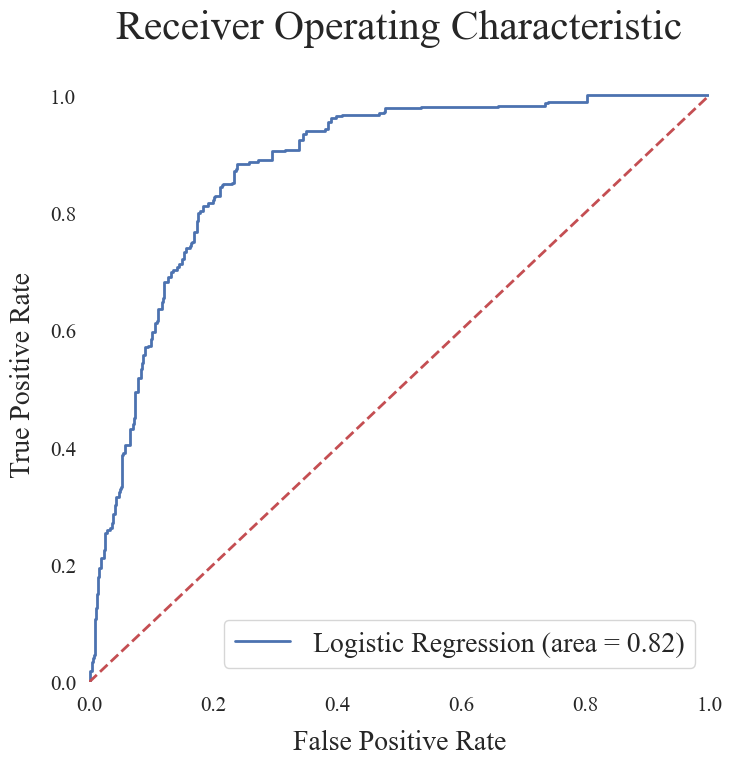

In [168]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Linear Regression

### Data Normalization

Normalize the data

In [169]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

scaled_redwine_linear = normalize_data(columns)

In [170]:
scaled_redwine_linear = scaled_redwine_linear.drop("quality", axis=1)

## Helper Functions

In [171]:
def create_varialbles(data, indepdent_varialble, dependent_variable):
    """
    Assign independent and dependent variables.
    """

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

In [172]:
def linear_regression_model(X, y):
    """
    Creates the linear regression model.
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.2, random_state=0
    )
    log_model = LinearRegression()
    log_model.fit(X_train, y_train)
    y_predict = log_model.predict(X_test)

    return log_model, X_train, X_test, y_train, y_test, y_predict

In [270]:
def display_scatterplot(data, x_axis, y_axis, title, x_label, y_label):
    '''
    Creates a scatter plot.
    '''
    
    sns.despine(left=True, bottom=True)

    plt.scatter(data[x_axis], data[y_axis], color=color_10, s=10)
    plt.title(title, size=size)
    plt.xlabel(x_label, size=size * 0.75)
    plt.ylabel(y_label, size=size * 0.75)

    plt.show()

In [271]:
def print_rsquared(y_test, y_predict):
    '''
    Prints the R-Squared value.
    '''
    
    print("R-Squared is: ", np.round(r2_score(y_test, y_predict), 2))

## Linear Regression Citric Acid and Alcohol

In [272]:
data = scaled_redwine_linear

indepdent_varialble = [
    "citric acid",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [273]:
print_rsquared(y_test, y_predict)

R Squared is:  0.01


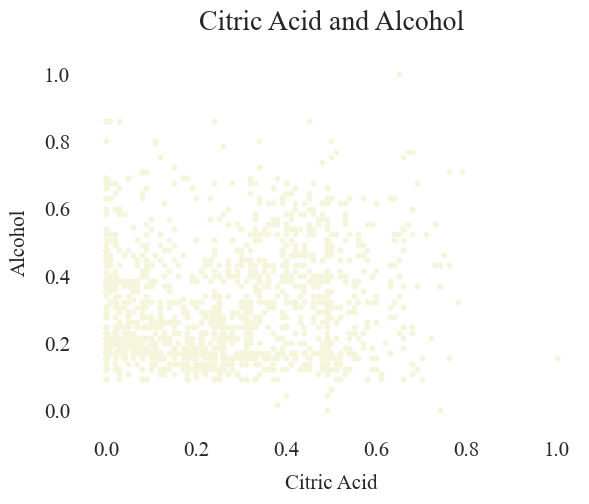

In [337]:
title = "Citric Acid and Alcohol"
x_axis = "citric acid"
y_axis = "alcohol"
x_label = "Citric Acid"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression Density and Alcohol

In [276]:
data = scaled_redwine_linear

indepdent_varialble = [
    "density",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [275]:
print_rsquared(y_test, y_predict)

R Squared is:  0.01


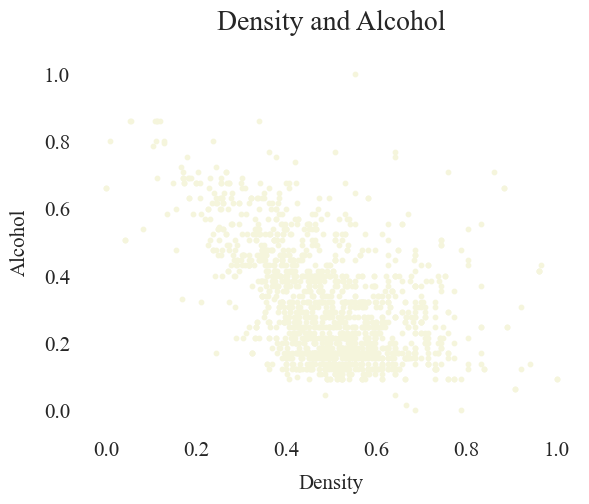

In [338]:
title = "Density and Alcohol"
x_axis = "density"
y_axis = "alcohol"
x_label = "Density"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression Fixed Acidity and Alcohol

In [278]:
data = scaled_redwine_linear

indepdent_varialble = [
    "fixed acidity",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [279]:
print_rsquared(y_test, y_predict)

R Squared is:  0.0


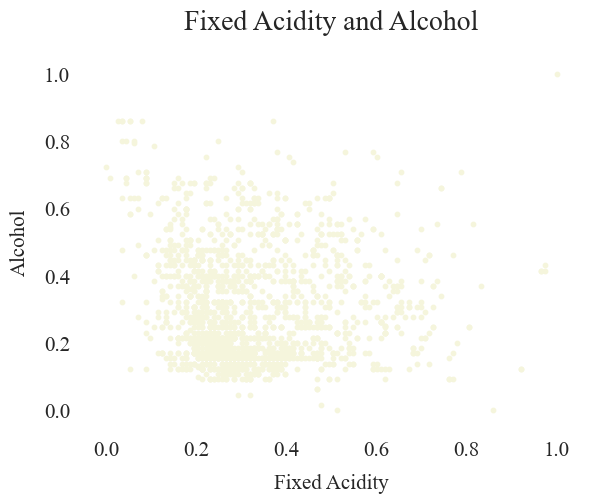

In [339]:
title = "Fixed Acidity and Alcohol"
x_axis = "fixed acidity"
y_axis = "alcohol"
x_label = "Fixed Acidity"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression Sulphates and Alcohol

In [282]:
data = scaled_redwine_linear

indepdent_varialble = [
    "sulphates",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [283]:
print_rsquared(y_test, y_predict)

R Squared is:  0.0


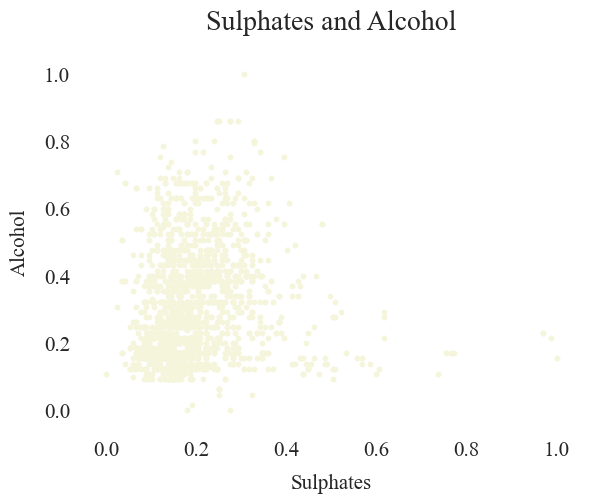

In [340]:
title = "Sulphates and Alcohol"
x_axis = "sulphates"
y_axis = "alcohol"
x_label = "Sulphates"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression Chlorides and Alcohol

In [284]:
data = scaled_redwine_linear

indepdent_varialble = [
    "chlorides",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [285]:
print_rsquared(y_test, y_predict)

R Squared is:  0.07


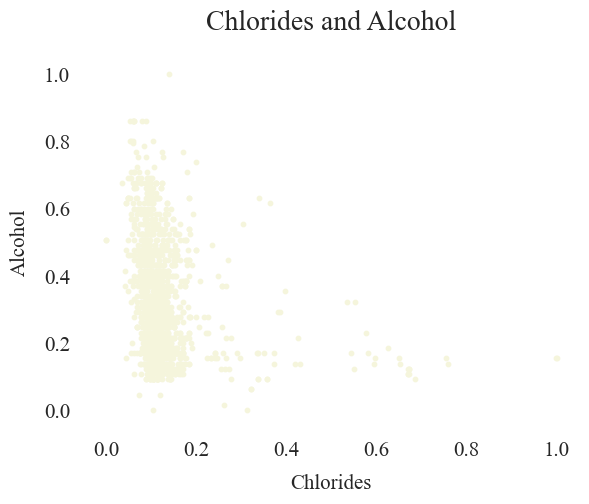

In [341]:
title = "Chlorides and Alcohol"
x_axis = "chlorides"
y_axis = "alcohol"
x_label = "Chlorides"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression Total Sulfur Dioxide and Alcohol

In [287]:
data = scaled_redwine_linear

indepdent_varialble = [
    "total sulfur dioxide",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [288]:
print_rsquared(y_test, y_predict)

R Squared is:  0.03


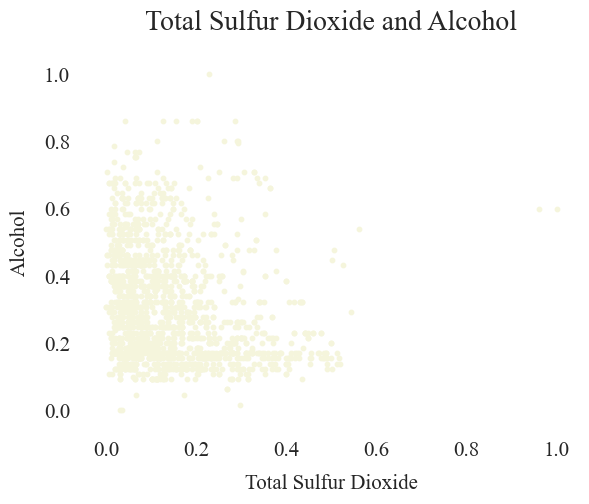

In [342]:
title = "Total Sulfur Dioxide and Alcohol"
x_axis = "total sulfur dioxide"
y_axis = "alcohol"
x_label = "Total Sulfur Dioxide"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression Free Sulfur Dioxide and Alcohol

In [251]:
data = scaled_redwine_linear

indepdent_varialble = [
    "free sulfur dioxide",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

R Squared is:  -0.01


In [290]:
print_rsquared(y_test, y_predict)

R Squared is:  0.03


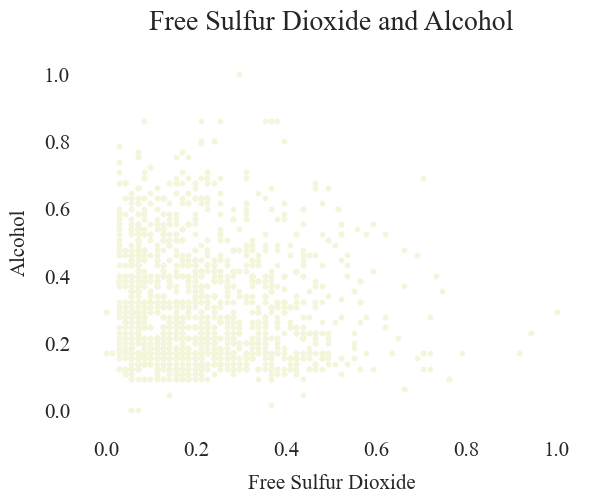

In [343]:
title = "Free Sulfur Dioxide and Alcohol"
x_axis = "free sulfur dioxide"
y_axis = "alcohol"
x_label = "Free Sulfur Dioxide"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Linear Regression pH and Alcohol

In [298]:
data = scaled_redwine_linear

indepdent_varialble = [
    "pH",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

In [299]:
print_rsquared(y_test, y_predict)

R Squared is:  0.05


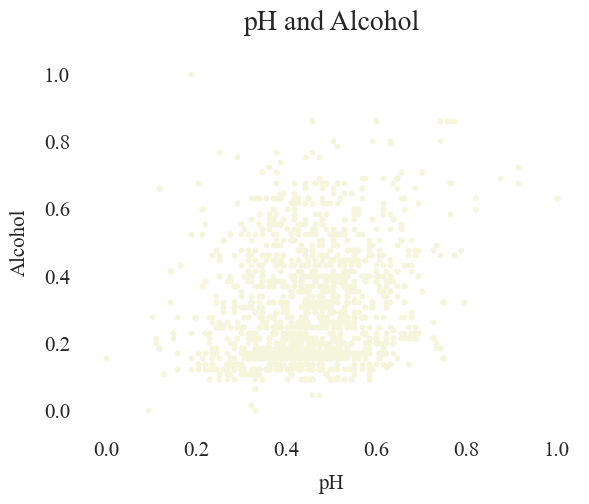

In [344]:
title = "pH and Alcohol"
x_axis = "pH"
y_axis = "alcohol"
x_label = "pH"
y_label = "Alcohol"

display_scatterplot(data, x_axis, y_axis, title, x_label, y_label)

## Multivariant Linear Regression

In [345]:
data = scaled_redwine_linear

indepdent_varialble = [
    "density",
    "volatile acidity",
    "residual sugar",
    "total sulfur dioxide",
    "chlorides",
    "pH",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

### R-Squared

In [346]:
print_rsquared(y_test, y_predict)

R Squared is:  0.44


### Adjusted R-Squared

In [297]:
adjusted_r2 = 1 - (1 - log_model.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
adjusted_r2 = np.round(adjusted_r2, 2)
print("Adjusted R-Squared is", adjusted_r2)

Adjusted R-Squared is 0.39


### Predicted R-Squared

In [314]:
# y_true = y
# y_pred = y_predict
# xs = X

In [327]:
def press_statistic(y, y_predict, X):
    res = y_pred - y
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y, y_predict, X):
    press = press_statistic(y=y,
                            y_predict=y_predict,
                            X=X)
    
    return press

In [ ]:
press = predicted_r2(y, y_predict, X)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Conclusions

In this section, I summarize the conclusions that can and cannot be drawn from this report. 

>* **Model for Quality:** I analyzed the reviews of nearly 2 million reviews of about 100,000 podcasts.  <br>
>* **Model for Alcohol:** This analysis showed that about 80% of reviewers were those who rated the podcast with 4 or 5 stars. This fact, makes the results of this analysis highly suspect and I can not come to a sure conclusion about the general sentiments of the podcast listener population. What about those who did not write any reviews? Were they satisfied, or dissatisfied? <br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outline what those weaknesses and some avenues for improvement. 

>* **Reviews:** Of the nearly 2 million reviews, over 1.5 million were from those who gave the podcast a 5-star. This report could be improved if we know more about those who did not write any reviews. Who are they? What are their thoughts? Why did they not write a review? These are important questions that need to be answered. <br>
>* **Sentiment Analysis:** This was my first experience with sentiment analysis and I found it not just a science but also an art. I experimented with various tools and methods of cleaning the text with mixed results. Learning more about this science/art will improve future reports of a similar kind. <br>
>* **Spell Corrector:** I tested various ways to correct the spelling of the reviews. My research showed that this too is both an art and a science. Learning more about this science/art will improve future reports. <br>
>* **Lemmatization:** Similar to spelling correction, I found various tools for lemmatization. None of them provided what I would call excellent results. This too seems to be both an art and a science. I hope to become better at it. <br>
>* **Lambda Functions:** I used lambda functions in several instances in this report. These functions loop through the data frame, which is much slower than using vectorization which performs multiple operations at once. This is how Panda and Numpy operations work. I will be aware of this issue in future reports.
>* **Type Hinting:** Make my functions clearer by using type hinting, to indicate the type of the variables within the functions.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **SQL:** I will continue to increase my knowledge of SQL and become more skilled in this language.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>